In [1]:
import pyart
import numpy as np
import matplotlib.pyplot as plt
import warnings
import glob
import copy
import os
import datetime
import scipy
import pandas as pd
import matplotlib.dates as mdates
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
np.set_printoptions(threshold=np.inf)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [10]:
datadir = '/nfs/foe-data-32/export/ncas/earljbe/RAINE/calibrations/Zcalib/phi_files/010620_norm/'

In [11]:
os.chdir(datadir)
filelist = glob.glob("startphi*")
filelist.sort()
ndays=len(filelist)
print ndays
startphi=np.zeros((ndays,290,3600))*np.nan

116


In [12]:
dates=[]
for d in range(len(filelist)):
    day = filelist[d]
    dates.append(day[13:21])
    startphi1 = np.load(datadir + day)
    [a,b] = startphi1.shape
    startphi[d,0:a,0:b] = startphi1

In [13]:
all_phi=[]

In [14]:
day

'startphi_all_20200522.npy'

In [15]:
for d in range(len(filelist)):
    daily_median_phi = np.nanmedian(startphi[d].flatten())
    all_phi.append(daily_median_phi)

In [16]:
time = pd.to_datetime(dates, format = '%Y%m%d')
data = pd.DataFrame({'phi' : all_phi}, index=time)

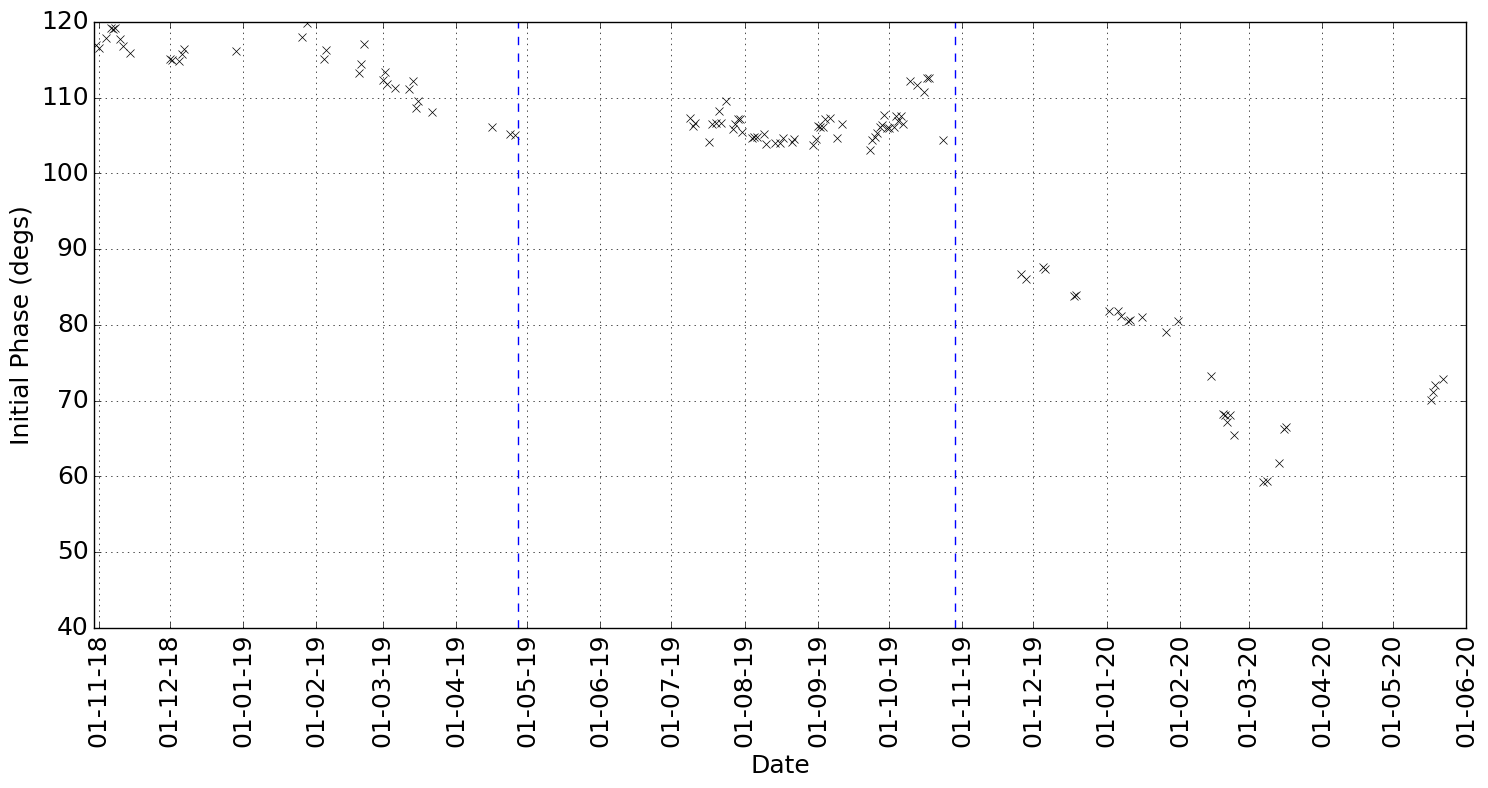

In [17]:
fig, ax1 = plt.subplots(figsize=(15,8)) 
plt.plot(data.index,data['phi'],'kx')
plt.plot([pd.to_datetime('20190427'), pd.to_datetime('20190427')],[40, 120],'b--')        
plt.plot([pd.to_datetime('20191029'), pd.to_datetime('20191029')],[40, 120],'b--')     
#plt.plot([pd.to_datetime('20191105'), pd.to_datetime('20191105')],[40, 120],'b--')     
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xlim(pd.to_datetime('20181030'),pd.to_datetime('20200601'))
plt.xticks(rotation=90)
plt.yticks(size=18)
plt.xticks(size=18)
plt.grid()
plt.xlabel('Date',{'fontsize':18})    
plt.ylabel('Initial Phase (degs)',{'fontsize':18})
plt.tight_layout()
#plt.savefig(datadir+'initial_phase.png',dpi=150)
#plt.close()

In [86]:
datadir+'initial_phase.png'

'/nfs/foe-data-32/export/ncas/earljbe/RAINE/calibrations/Zcalib/phi_files/210520/initial_phase.png'